## A Brief Analysis of Generation 7 Video Game Consoles Based on Game Sales by Region

## Introduction

The following data is on video games sales that have sold at least 10,000 copies, which includes a little over 16,500 games. Posted on kaggle, the data was generated by a scrape of vgchartz.com and was last updated on 2016-10-26.

I'm interested in this data, because video games have been a hobby of mine since childhood.

The following dataset has columns for the name, platform, year realeased, genre, and publisher of each game along with the ranking of each game by total copies sold. There are five columns for sales (in millions); four of which are by region which include North America, Japan, Europe, and all other regions combined. The fifth sales column is the total global sales.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [3]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## Cleaning

Now for some cleanup. First, the sales are rounded to the nearest ten thousand copies, or the nearest hundredth in the table since the data is in millions. Because this rounding does not handle a small number of copies sold in a particular region well, we will turn our attention towards the games that sold at least one million copies. This retains just over two thousand of the above games. Next, we exclude the top two games because these games were included with the purchase of a console.

In [4]:
df1 = df[df.Global_Sales >= 1]
df1 = df1.drop(df1.index[[0,1]])
df1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
11,12,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42


In [5]:
df1.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,2079.000000,2057.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000
mean,1042.686869,2004.701507,1.306878,0.784589,0.344137,0.252987,2.688586
std,600.672608,7.202083,1.646761,1.053446,0.765921,0.440148,3.101305
min,3.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,522.500000,2001.000000,0.570000,0.270000,0.000000,0.070000,1.270000
50%,1043.000000,2006.000000,0.900000,0.500000,0.030000,0.150000,1.710000
75%,1562.500000,2010.000000,1.480000,0.920000,0.335000,0.270000,2.810000
max,2082.000000,2016.000000,26.930000,12.880000,10.220000,10.570000,35.820000


## Analytic Questions

We explore the following from the data:
1. What video game consoles had the most games that sold significantly?
2. Which genre of video game has been the most popular?

In more recent history:
3. How did the big three video game consoles fare in each major region during the 7th console generation? This generation's biggest three consoles were the Nintendo Wii, Xbox 360, and Playstation 3.
4. What genres of video games were the most popular in each region during the 7th generation?

In the interest of comparing genres and consoles in each region in a more manageable way, we create new columns for the ratio of sales in each region to the total global sales.

In [9]:
df1['NA_Ratio']=df1['NA_Sales'] / df1['Global_Sales']
df1['JP_Ratio']=df1['JP_Sales'] / df1['Global_Sales']
df1['EU_Ratio']=df1['EU_Sales'] / df1['Global_Sales']
df1['Other_Ratio']=df1['Other_Sales'] / df1['Global_Sales']
df1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Ratio,JP_Ratio,EU_Ratio,Other_Ratio
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0.442490,0.105807,0.359576,0.092406
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0.477273,0.099394,0.333636,0.089697
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.359260,0.325789,0.283392,0.031878
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,0.766689,0.139458,0.074686,0.019167
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,0.379207,0.216594,0.307564,0.096634
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,0.483460,0.100965,0.317023,0.098208
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,0.509783,0.164221,0.246681,0.078966
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,0.951254,0.009890,0.022254,0.016602
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76,0.366317,0.077948,0.444265,0.111066
11,12,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42,0.418873,0.176345,0.323228,0.081981


Before focusing on the three consoles mentioned in the 7th generation, let us answer the first two questions!

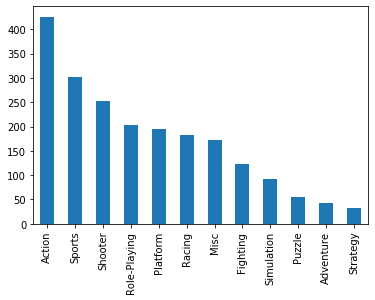

In [7]:
df1['Genre'].value_counts().plot(kind='bar')

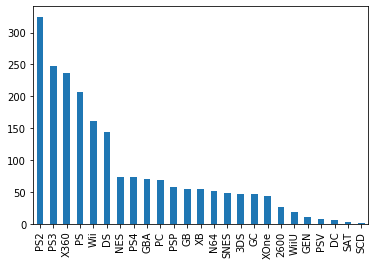

In [8]:
df1['Platform'].value_counts().plot(kind='bar')

Overall (globally), action and sports games have been the most popular, and the various playstation consoles PS, PS2, PS3, and PS4 have a clear lead with Xbox 360 towards the top as well. Now to the 7th generation questions!

In [11]:
df_3consoles = df1[df1['Platform'].isin(['X360','Wii','PS3'])]
df_3consoles

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Ratio,JP_Ratio,EU_Ratio,Other_Ratio
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0.442490,0.105807,0.359576,0.092406
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0.477273,0.099394,0.333636,0.089697
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,0.483460,0.100965,0.317023,0.098208
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,0.509783,0.164221,0.246681,0.078966
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72,0.393486,0.158451,0.353433,0.094630
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00,0.413182,0.115000,0.390455,0.081364
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,0.686068,0.010999,0.226398,0.076535
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,0.327570,0.045327,0.433178,0.193458
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,0.587912,0.003663,0.324176,0.084249
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,0.611789,0.008808,0.289973,0.089431


For the 7th generation consoles, we make a boxplot for the ratio of games sold by region.

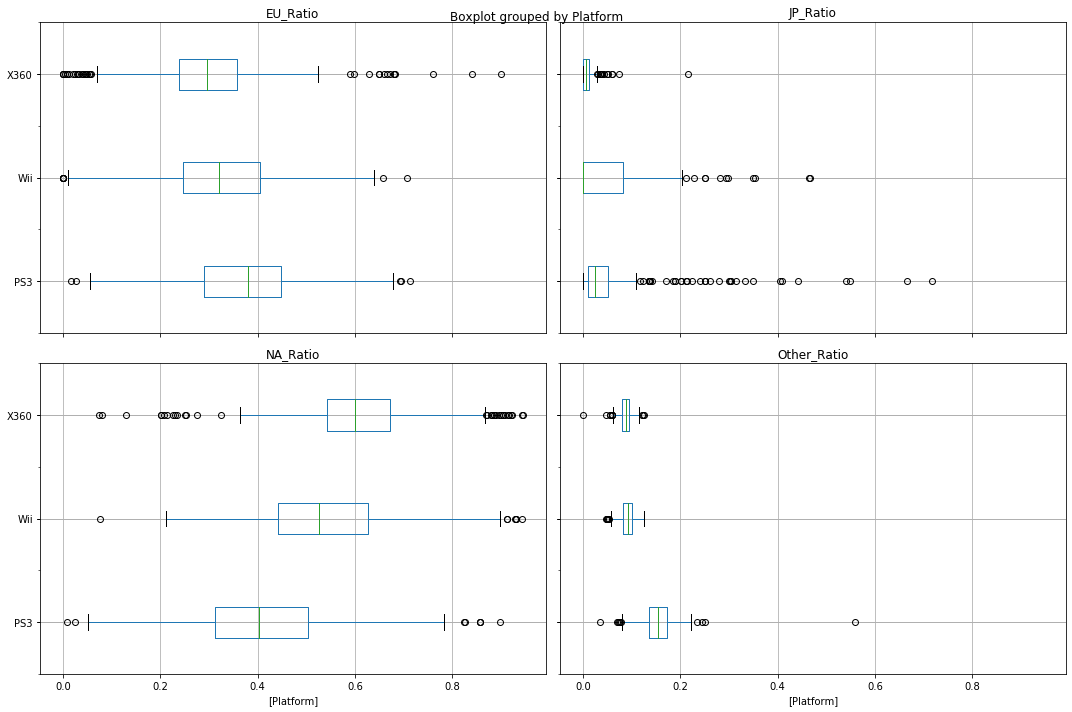

In [12]:
df_sale_ratio_3platforms = df_3consoles[['Platform','NA_Ratio','EU_Ratio','JP_Ratio','Other_Ratio']]
df_sale_ratio_3platforms.boxplot(by='Platform', vert=False, figsize=[15,10])
plt.tight_layout()
plt.show()

Here is a similar figure using total sales, instead of the ratio. We also include global sales. This time, outliers are removed to get a clear picture.

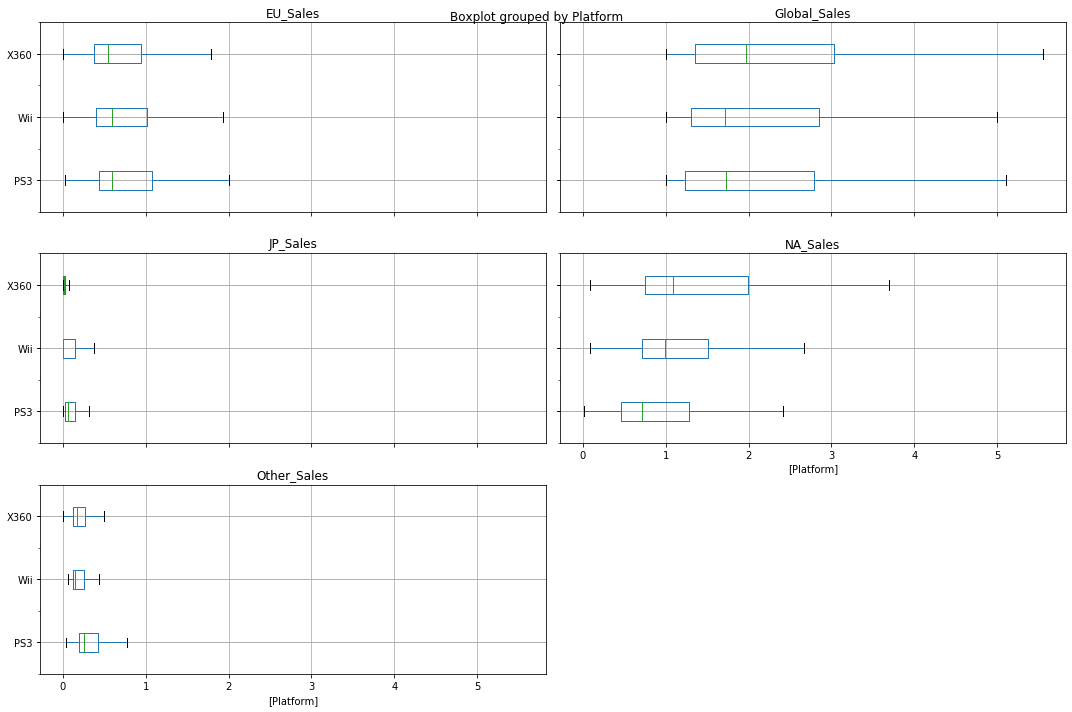

In [13]:
df_sales_3platforms = df_3consoles[['Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
df_sales_3platforms.boxplot(by='Platform', vert=False, figsize=[15,10], showfliers=False)
plt.tight_layout()
plt.show()

In North America, the Xbox 360 is the most popular console in terms of both plots: in terms of total game sales and ratio of games sold.
In Europe the PS3 is the most popular console according to both plots.
In Japan, the Wii and PS3 are arguably close; in both plots the median is higher for the PS3, however the 3rd quartile is larger for the Wii.
In other regions outside of the above three, the PS3 is the clear winner.
In terms of overall global sales, the Xbox 360 was the most successful in terms of total game sales. This is not too surprising since North America was a large portion of the market.

Now to the 4th question. Only among the three main consoles during the 7th generation, we look at analogous box plots by genre in each region. First is the plot by ratio, and what follows is the plot by total sales. Again, the outliers for the total sales plot are removed.

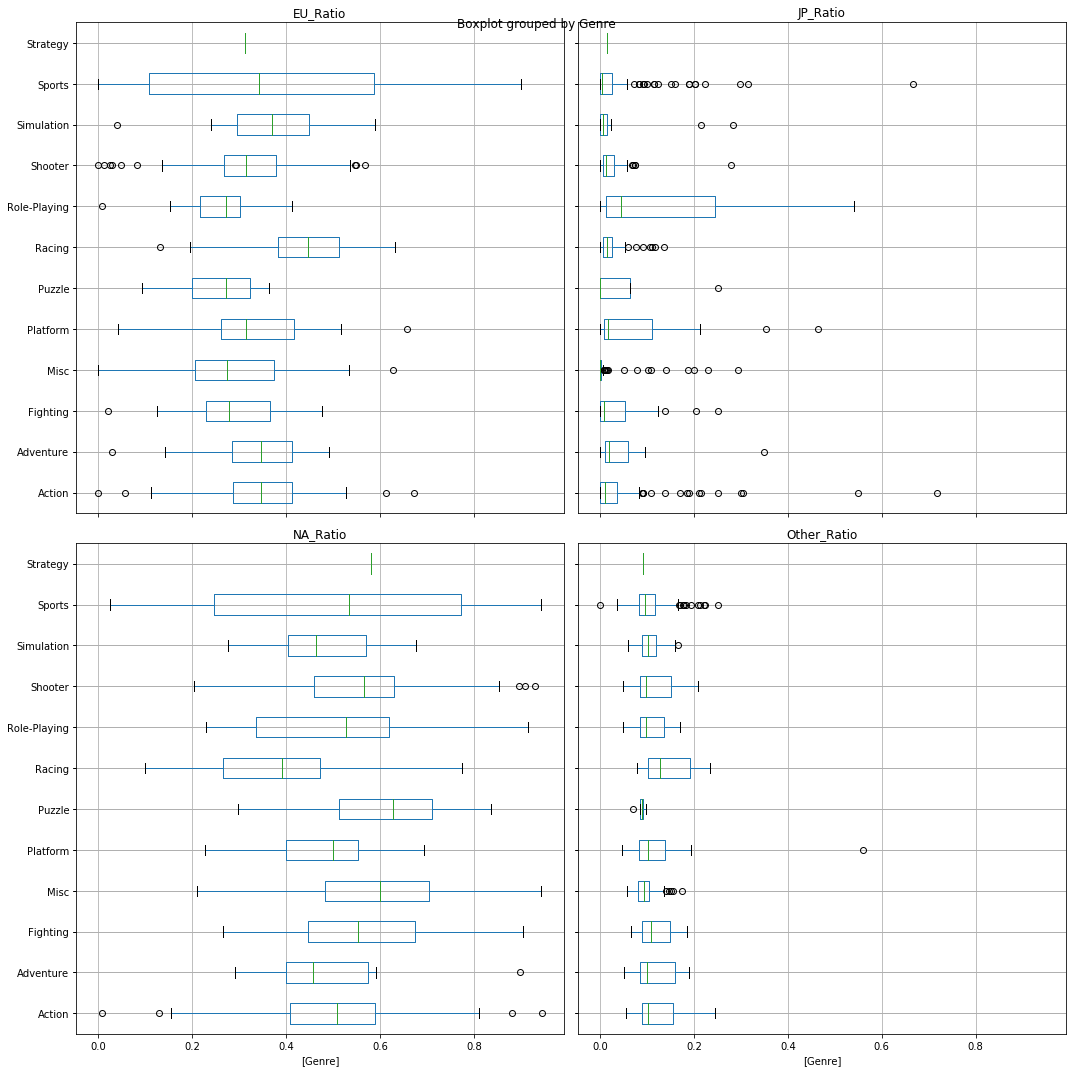

In [14]:
df_sale_ratio_genre_3platforms = df_3consoles[['Genre','NA_Ratio','EU_Ratio','JP_Ratio','Other_Ratio']]
df_sale_ratio_genre_3platforms.boxplot(by='Genre', vert=False, figsize=[15,15])
plt.tight_layout()
plt.show()

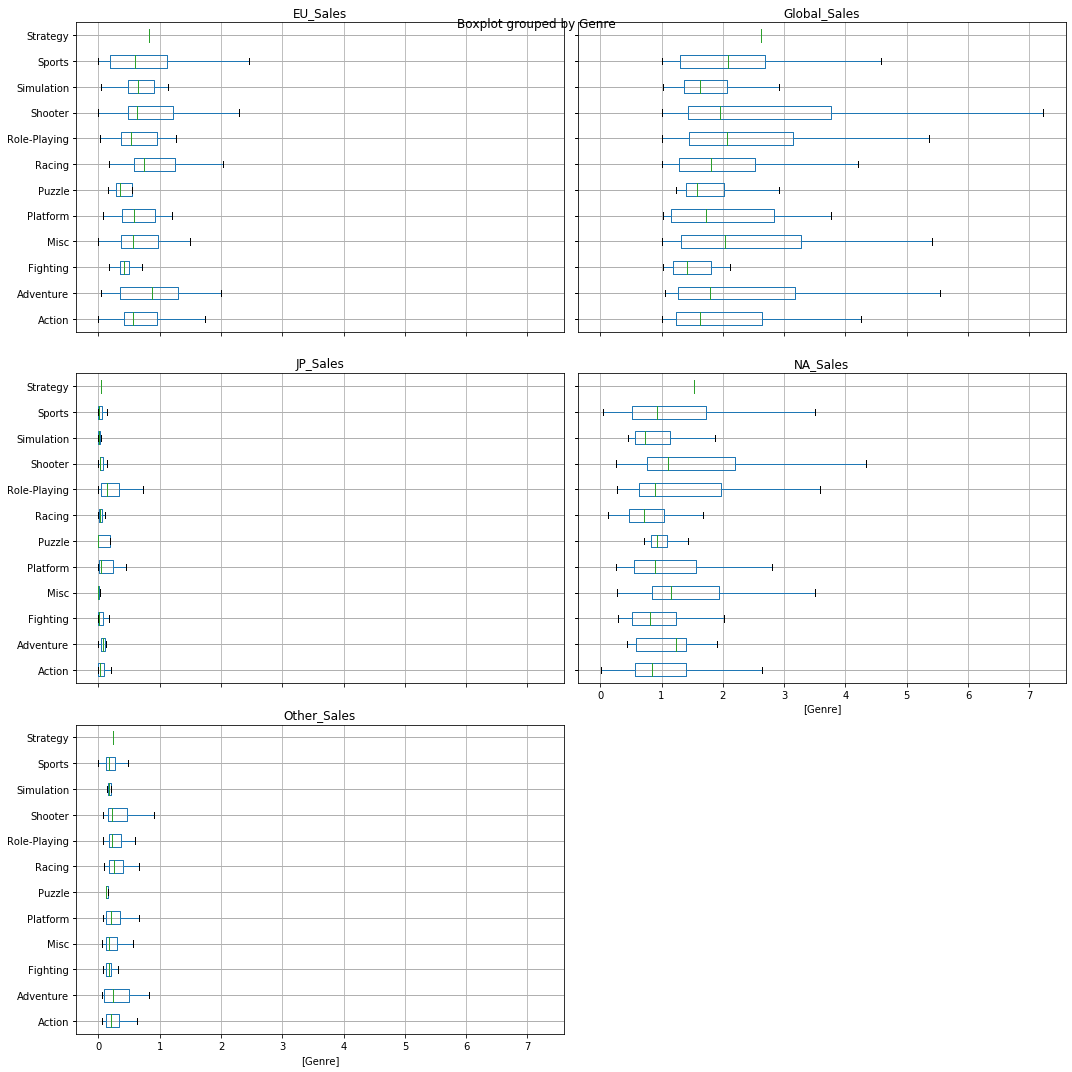

In [15]:
df_sale_genre_3platforms = df_3consoles[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
df_sale_genre_3platforms.boxplot(by='Genre', vert=False, figsize=[15,15], showfliers=False)
plt.tight_layout()
plt.show()

With the genres, the two plots don't coincide quite as well. We give more weight to the total sales by genre plot.
In North America, the most popular genres during the 7th generation was shooter games, followed by RPGs (role-playing games), misc., and sports games.
In Europe, the most popular genres during the 7th generation were adventure, racing, and sports games.
In Japan, RPGs and platformers reigned supreme.
In other regions shooters and adventure games had a clear lead.
In terms of overall global sales, shooter games were towards the top.

## Improvement and Further Questions

A shortcoming of the data is that it only covers game sales up until October of 2016, which is why when I focused on a specific generation, I did the 7th generation since that generation was coming to a close at that time. I would have also found more careful ways to clean the data. For example, I'm not sure if focusing on sales that were at least a million was the optimal choice.

If given more time to explore this data set, I would have investigated the data by year and looked for trends, such as how the popularity of each genre changed with time. Other good time-related questions to explore are what were the top three gaming publishers each year? In each region, which gaming publisher was the most popular each year?